In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [ ]:
train_df = pd.read_csv('/content/carprice-230219-081309.csv')
train_df.shape

(205, 26)

In [ ]:
train_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
train_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
train_df.skew(numeric_only=True)

,0
car_ID,0.000000
symboling,0.211072
wheelbase,1.050214
carlength,0.155954
carwidth,0.904003
carheight,0.063123
curbweight,0.681398
enginesize,1.947655
boreratio,0.020156
stroke,-0.689705


### Exploratory Data Analysis

In [ ]:
train_df['symboling'].value_counts()

,count
symboling,
0,67
1,54
2,32
3,27
-1,22
-2,3


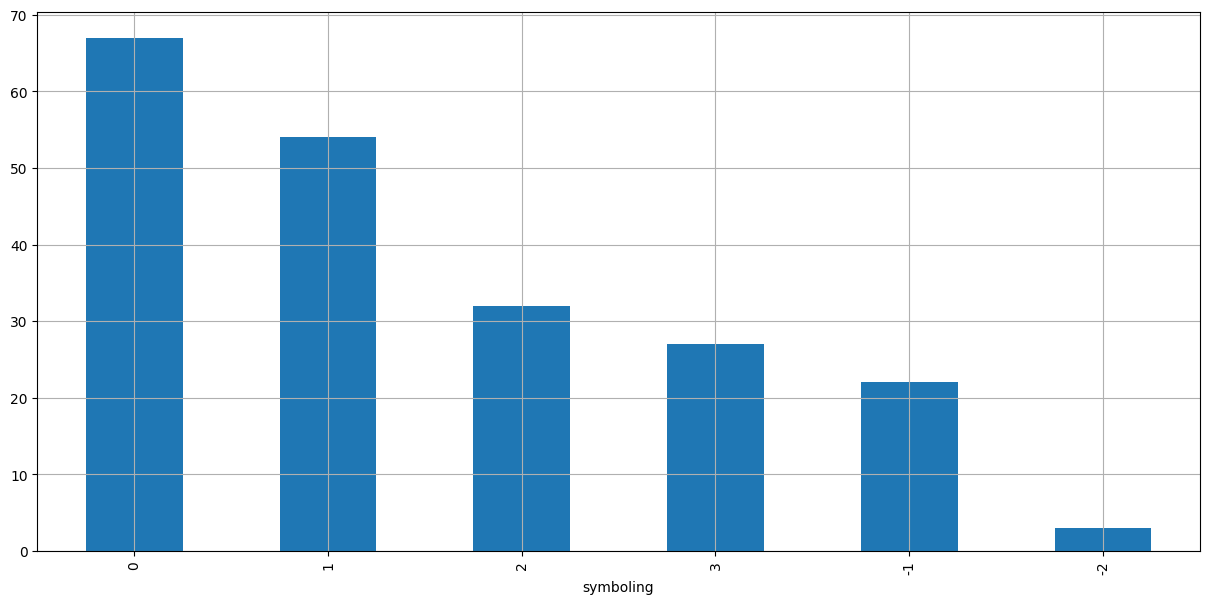

In [ ]:
paper = plt.figure(figsize=[15,7])
train_df['symboling'].value_counts().plot.bar()
plt.grid(visible=True)

In [ ]:
train_df['CarName'].value_counts()

,count
CarName,
peugeot 504,6
toyota corolla,6
toyota corona,6
subaru dl,4
mitsubishi outlander,3
...,...
volkswagen super beetle,1
volkswagen rabbit custom,1
volvo 245,1


In [ ]:
train_df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

<Axes: xlabel='price', ylabel='Count'>

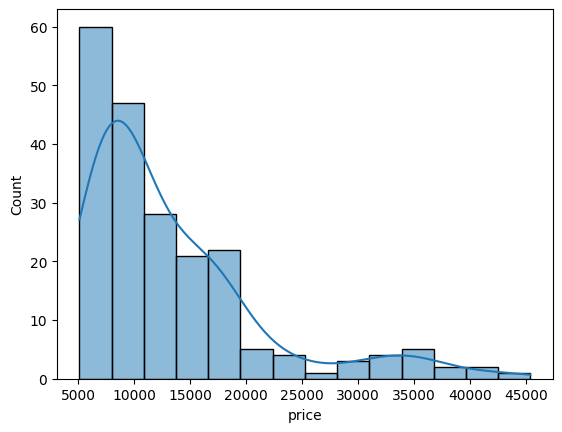

In [ ]:
sns.histplot(train_df['price'],kde=True)

/tmp/ipython-input-2328516171.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['price'],kde=True)


<Axes: xlabel='price', ylabel='Density'>

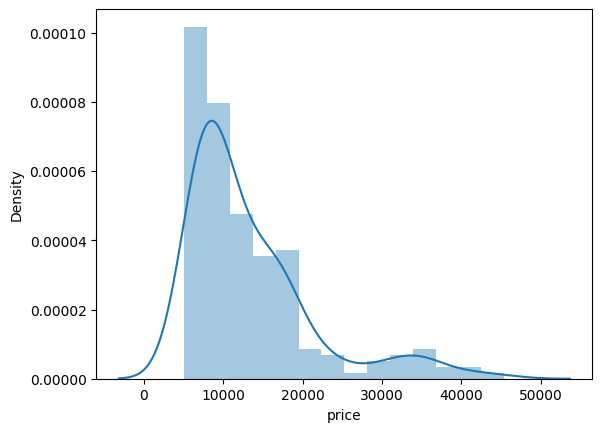

In [ ]:
sns.distplot(train_df['price'],kde=True)

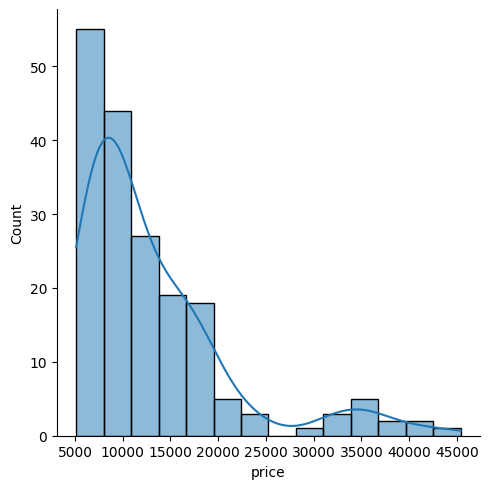

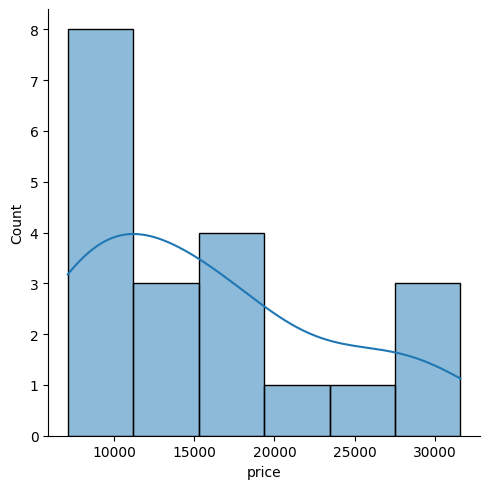

In [ ]:
sns.displot(train_df[train_df['fueltype']=='gas']['price'],kde=True)
sns.displot(train_df[train_df['fueltype']=='diesel']['price'],kde=True)

/tmp/ipython-input-1338992144.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fueltype',y='price',data=train_df,palette='flare')


<Axes: xlabel='fueltype', ylabel='price'>

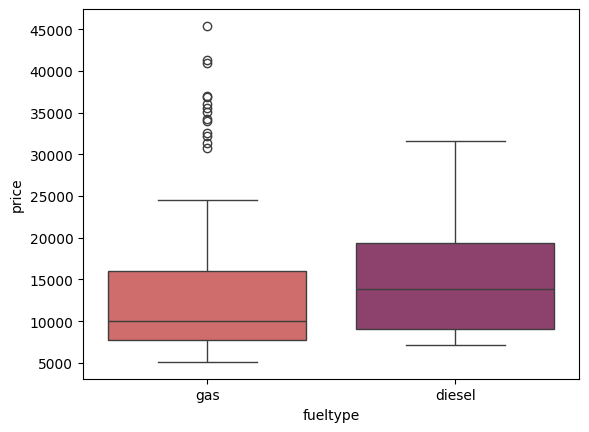

In [ ]:
sns.boxplot(x='fueltype',y='price',data=train_df,palette='flare')

/tmp/ipython-input-1436234140.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='symboling',y='price',data=train_df,palette='flare')


<Axes: xlabel='symboling', ylabel='price'>

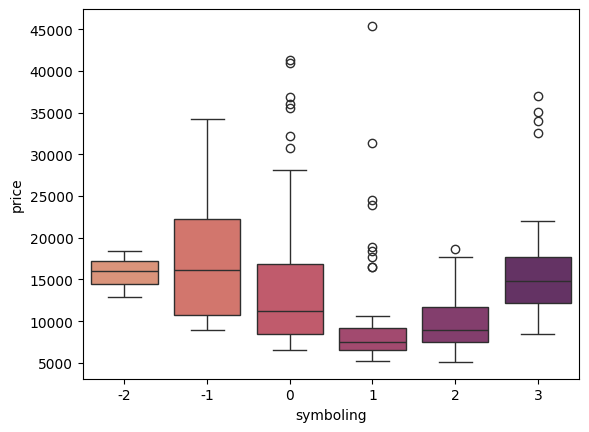

In [ ]:
sns.boxplot(x='symboling',y='price',data=train_df,palette='flare')

/tmp/ipython-input-418426555.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='enginetype',y='price',data=train_df,palette='Spectral')


<Axes: xlabel='enginetype', ylabel='price'>

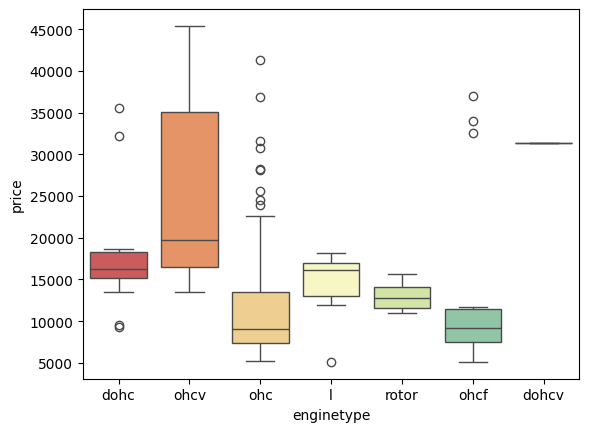

In [ ]:
sns.boxplot(x='enginetype',y='price',data=train_df,palette='Spectral')

/tmp/ipython-input-1241560886.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cylindernumber',y='price',data=train_df,palette='Spectral')


<Axes: xlabel='cylindernumber', ylabel='price'>

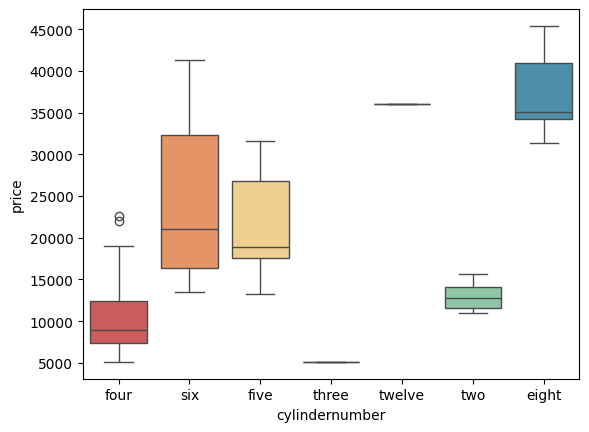

In [ ]:
sns.boxplot(x='cylindernumber',y='price',data=train_df,palette='Spectral')

## Feature Engineering


In [ ]:
train_df['Brandname'] = train_df['CarName'].str.split(' ').str[0]
train_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brandname
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [ ]:
train_df['Brandname'].replace({'maxda':'mazda','Nissan':'nissan','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'},inplace=True)

/tmp/ipython-input-3855848459.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Brandname'].replace({'maxda':'mazda','Nissan':'nissan','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'},inplace=True)


In [ ]:
train_df.Brandname.value_counts()

,count
Brandname,
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13
subaru,12
volkswagen,12
volvo,11
peugeot,11


<Axes: xlabel='Brandname'>

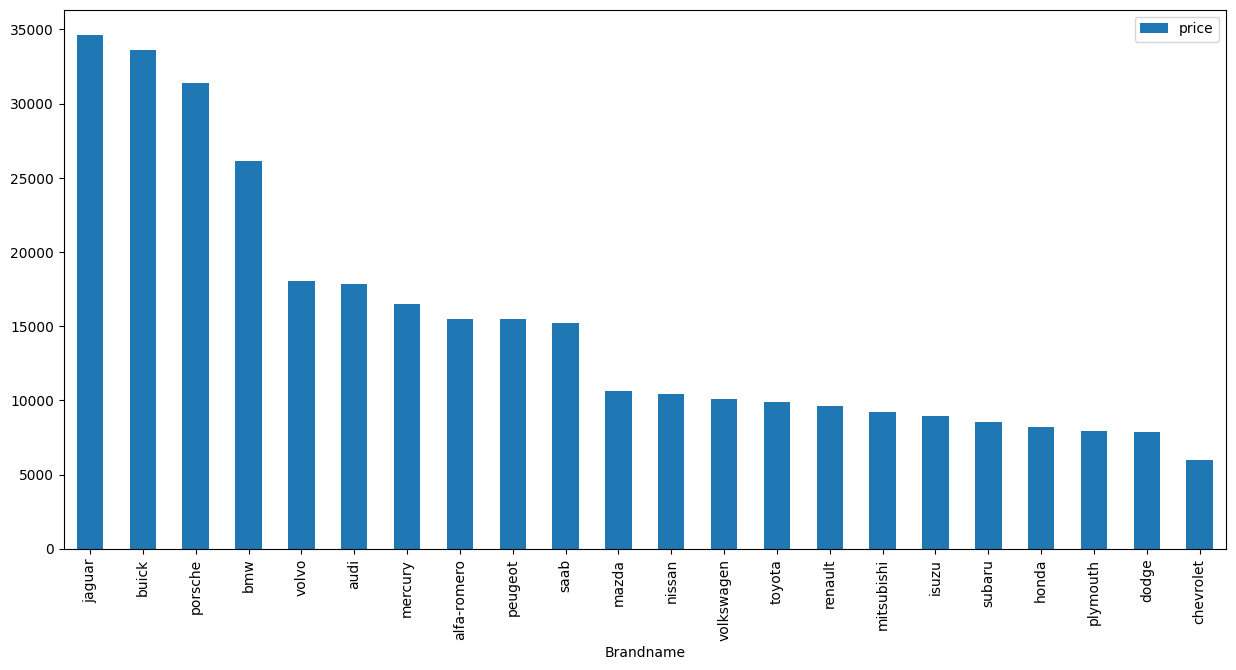

In [ ]:
(train_df
 .groupby('Brandname')
 .agg({'price':'mean'})
 .sort_values('price',ascending=False)).plot.bar(figsize=(15,7))

In [ ]:
data = train_df.copy()
data = data.drop(['car_ID','CarName'],axis=1)
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brandname
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'Brandname'],
      dtype='object')

In [ ]:
numerical_cols = data.select_dtypes(exclude=['object']).columns
numerical_cols

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [ ]:
all_categorical_dummies = pd.get_dummies(data[categorical_cols])
all_categorical_dummies.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,Brandname_nissan,Brandname_peugeot,Brandname_plymouth,Brandname_porsche,Brandname_renault,Brandname_saab,Brandname_subaru,Brandname_toyota,Brandname_volkswagen,Brandname_volvo
0,False,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,True,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,True,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,True,True,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
model_df = pd.concat([data[numerical_cols],all_categorical_dummies],axis=1)
model_df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,Brandname_nissan,Brandname_peugeot,Brandname_plymouth,Brandname_porsche,Brandname_renault,Brandname_saab,Brandname_subaru,Brandname_toyota,Brandname_volkswagen,Brandname_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,False,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,False,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,False,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,False,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
model_df.shape

(205, 75)

In [ ]:
x = model_df.drop('price',axis=1)
y = model_df['price']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
print(f"x_train.shape = {x_train.shape}")
print(f"x_test.shape = {x_test.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"y_test.shape = {y_test.shape}")


x_train.shape = (164, 74)
x_test.shape = (41, 74)
y_train.shape = (164,)
y_test.shape = (41,)


In [ ]:
rdf = RandomForestRegressor()
rdf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_train_predict = rdf.predict(x_train)
y_test_predict = rdf.predict(x_test)

In [ ]:
y_train_predict

array([15983.4       , 15395.1       ,  7421.02      ,  7307.69      ,
        9016.665     ,  6435.15      ,  7245.235     , 16851.44      ,
       13413.76      ,  6265.5       , 16401.91      ,  7133.84      ,
        9403.97      ,  7276.07      , 14682.76      ,  9487.65      ,
       12454.82      , 35609.215     ,  5563.66      ,  9779.26      ,
       17413.55333333, 11041.55333333, 16938.16      , 10783.86      ,
        6652.865     , 20271.00166667,  7269.33      , 19784.5       ,
       10055.24      ,  7128.56      , 17787.48      ,  7779.82      ,
        6225.86      , 15786.95      ,  9980.52      , 12296.5       ,
       13751.14      ,  6607.2       ,  7999.81      ,  7288.75      ,
       18068.05      , 17713.29      , 18323.99      , 16252.77      ,
        6259.05      , 11857.665     ,  7507.65      , 33653.465     ,
        7701.01      ,  5753.13      ,  7334.02      , 16635.72      ,
        9850.025     ,  6192.65      , 15135.58      , 12779.6       ,
      

In [ ]:
y_test_predict

array([36893.45857143, 18978.51      ,  8952.39      , 13375.18166667,
       27183.37      ,  6598.47      ,  7808.03      ,  7866.31      ,
       10170.18      ,  8046.195     , 14928.04      ,  7940.64      ,
       14672.27666667, 10933.43333333, 40013.85357143,  6484.64      ,
        5681.7       , 14223.01      ,  8199.875     ,  9729.605     ,
       10342.435     , 15184.35      ,  7112.995     ,  5815.74      ,
        7288.75      , 36787.11857143,  9487.65      , 16577.03      ,
        7276.07      , 16231.85      , 27437.62      ,  6415.14      ,
        8089.81      , 18740.72      ,  8028.12      , 27071.08      ,
       10716.215     , 12454.82      ,  7797.7       , 14533.47      ,
        8517.87333333])

In [ ]:
print(f"rdf.score(x_train,y_train) = {rdf.score(x_train,y_train)}")
print(f"rdf.score(x_test,y_test) = {rdf.score(x_test,y_test)}")

rdf.score(x_train,y_train) = 0.9857650635534373
rdf.score(x_test,y_test) = 0.9585279701491065


In [ ]:
print(f"root_mean_squared_error(y_train,y_train_predict) = {root_mean_squared_error(y_train,y_train_predict)}")
print(f"root_mean_squared_error(y_test,y_test_predict) = {root_mean_squared_error(y_test,y_test_predict)}")

root_mean_squared_error(y_train,y_train_predict) = 921.3798483797145
root_mean_squared_error(y_test,y_test_predict) = 1809.411172307367


## Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_train_predict_lr = lr.predict(x_train)
y_test_predict_lr = lr.predict(x_test)

In [ ]:
y_train_predict_lr

array([14910.05670227, 14098.57776335,  5310.80848742,  7064.50695302,
        9147.77961932,  6595.82912988,  6114.60473204, 17184.57764279,
       12964.        ,  5994.00458416, 16588.57061403,  6935.36754473,
        9356.97771211,  6364.60809506, 14870.46593586, 11212.51039545,
       12728.50500572, 36141.84597419,  5962.1521155 ,  8834.49197488,
       16156.97449333, 10069.17809206, 16503.        , 11458.38639859,
        6599.26445799, 21169.63025392,  7503.4227804 , 22018.        ,
       11965.65818055,  7011.58821298, 16102.53075195,  6530.6843531 ,
        6776.03228354, 14609.14220509,  8643.0515442 , 11324.34181944,
       14030.86989972,  6495.31043908,  7937.62675129,  7018.97183018,
       17472.04496114, 18469.34223364, 18145.83363991, 15871.37179828,
        6099.43057634, 11048.        ,  7557.37095383, 33721.07701291,
        8795.7505951 ,  5950.02596774,  7108.68429846, 16695.85746159,
       10545.76779345,  5342.03491317, 14280.31177978, 12307.23424135,
      

In [ ]:
y_test_predict_lr

array([29778.5170846 , 21742.73235495, 11134.24819083, 12506.64100721,
       30073.8111985 ,  6788.18571244,  7677.1953874 ,  7230.80555871,
        9508.13260147,  7862.71015641, 13097.80324928,  6066.12944487,
       15683.92019417,  9778.86619272, 43331.59759888,  6485.70709762,
       -3458.85922203, 13667.81650849,  9059.67050359,  9715.14876292,
       11402.91949037, 15642.67815999,  7618.841151  ,  4426.68068426,
        7018.97183018, 30433.84861255, 11186.1184046 , 15877.57032403,
        6450.38206532, 16107.20363049, 29540.37129668,  6670.05637912,
        5027.36258125, 17906.35714948,  7804.09308803, 28920.36571107,
       11746.89186227, 12728.50500572,  9073.98451531, 14239.85999686,
        8323.45753642])

In [ ]:
print(f"r2_score(y_train,y_train_predict_lr) = {r2_score(y_train,y_train_predict_lr)}")
print(f"r2_score(y_test,y_test_predict_lr) = {r2_score(y_test,y_test_predict_lr)}")

r2_score(y_train,y_train_predict_lr) = 0.9747039340582626
r2_score(y_test,y_test_predict_lr) = 0.9010854026798404


In [ ]:
print(f"root_mean_squared_error(y_train,y_train_predict_lr) = {root_mean_squared_error(y_train,y_train_predict_lr)}")
print(f"root_mean_squared_error(y_test,y_test_predict_lr) = {root_mean_squared_error(y_test,y_test_predict_lr)}")

root_mean_squared_error(y_train,y_train_predict_lr) = 1228.251874469974
root_mean_squared_error(y_test,y_test_predict_lr) = 2794.407993859453


## Decision Trees

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_train_predict_dt = dt.predict(x_train)
y_test_predict_dt = dt.predict(x_test)

In [ ]:
y_train_predict_dt

array([18344. , 15580. ,  6918. ,  7499. ,  9095. ,  6229. ,  7053. ,
       17425. , 12964. ,  6295. , 16558. ,  7099. ,  8948. ,  7349. ,
       15250. ,  8449. , 11845. , 37028. ,  5389. ,  9233. , 17199. ,
       11248. , 16503. , 10698. ,  6855. , 20970. ,  7295. , 22018. ,
       10345. ,  6938. , 18150. ,  7603. ,  6095. , 16695. ,  9538. ,
       12945. , 12764. ,  6669. ,  7957. ,  7609. , 18620. , 16845. ,
       18150. , 16500. ,  6189. , 11048. ,  7609. , 33278. ,  6989. ,
        5118. ,  7295. , 17075. ,  9720. ,  6377. , 15510. , 13845. ,
        6529. , 16925. , 18950. ,  8058. , 17710. ,  8558. , 33278. ,
       15985. ,  7126. , 17450. ,  5399. , 12440. ,  9495. , 16630. ,
        8013. , 16430. , 10245. ,  5572. ,  5348. , 11199. , 14997.5,
        7995. ,  7975. , 31600. , 22470. , 11245. ,  8916.5,  9298. ,
        8921. , 10295. , 13200. ,  8921. ,  7957. ,  8778. , 11595. ,
        8499. ,  8845. , 17669. , 33900. ,  7299. ,  7898. ,  6785. ,
        7775. , 1395

In [ ]:
y_test_predict_dt

array([36880. , 18620. ,  8949. , 12170. , 33900. ,  5118. ,  7995. ,
        8358. ,  8845. ,  7995. , 15250. ,  8058. , 12170. , 11248. ,
       45400. ,  6338. ,  5399. , 12964. ,  6989. ,  9095. , 10245. ,
       14399. ,  7299. ,  5348. ,  7609. , 36880. ,  8449. , 16515. ,
        7349. , 15985. , 33900. ,  6229. ,  6785. , 22018. ,  7957. ,
       33278. , 11694. , 11845. ,  8916.5, 14869. ,  8845. ])

In [ ]:
print(f"r2_score(y_train,y_train_predict_dt) = {r2_score(y_train,y_train_predict_dt)}")
print(f"r2_score(y_test,y_test_predict_dt) = {r2_score(y_test,y_test_predict_dt)}")

r2_score(y_train,y_train_predict_dt) = 0.9986537119069865
r2_score(y_test,y_test_predict_dt) = 0.9095113021179587


In [ ]:
print(f"root_mean_squared_error(y_train,y_train_predict_dt) = {root_mean_squared_error(y_train,y_train_predict_dt)}")
print(f"root_mean_squared_error(y_test,y_test_predict_dt) = {root_mean_squared_error(y_test,y_test_predict_dt)}")

root_mean_squared_error(y_train,y_train_predict_dt) = 283.3543900592572
root_mean_squared_error(y_test,y_test_predict_dt) = 2672.7404765470405


## Hyper Parameter Tuning

In [ ]:
param_distributions = {
      "max_depth": range(2,5),
      "min_samples_split": sp_randint(2, 11),
      "min_samples_leaf": sp_randint(1, 11),
      "bootstrap": [True, False],
      "n_estimators": [100, 400, 700, 1000, 1500],
      "max_features": ['sqrt', 'log2', None]
    }

In [ ]:
rsvrdf = RandomizedSearchCV(rdf,param_distributions=param_distributions,cv=5,n_iter=50,n_jobs=-1)
rsvrdf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': range(2, 5),
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78db6b6aec30>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78db6dc789b0>,
                                        'n_estimators': [100, 400, 700, 1000,
                                                         1500]})

In [ ]:
y_train_predict_count = rsvrdf.predict(x_train)
y_test_predict_count = rsvrdf.predict(x_test)

In [ ]:
y_train_predict_count

array([13939.35987047, 15688.05713863,  8092.04051855,  6820.10653838,
        9093.31150807,  6627.10573805,  7165.37118179, 15633.8670136 ,
       15330.45116212,  6663.73021827, 16674.35578807,  6864.08012389,
       10217.12430096,  6851.2336481 , 13953.06897707, 10696.77589665,
       12623.75544065, 34196.95277679,  6525.38940664, 10807.72811503,
       16923.21857879, 10666.73692112, 17492.36007074, 10432.69364507,
        6686.42358592, 17888.82318253,  6987.04696156, 17063.81635618,
        9552.91984825,  7103.42097199, 16695.67653801,  7801.70253948,
        6525.38940664, 15682.53761175, 10088.30111006, 12286.20050025,
       15382.56093191,  6619.78524485,  8605.75929627,  6784.80289973,
       16748.57734297, 19085.19903202, 17269.303418  , 15940.83681978,
        6546.53595837, 12499.04957245,  7498.55655748, 34196.95277679,
        9203.27883687,  6643.54328433,  6963.02197974, 16113.52828527,
       10241.97665832,  6525.38940664, 16073.47108565, 11644.78143089,
      

In [ ]:
y_test_predict_count

array([35151.85736668, 17222.67827893,  9371.36799139, 14173.80259129,
       28287.59219614,  6689.96654479,  8142.93116065,  7654.4582984 ,
       10281.8198208 ,  8175.11269329, 14878.08604816,  7659.58760743,
       15011.17326069, 10638.70269035, 36104.58575496,  6638.07606213,
        6525.38940664, 15388.56626557,  9536.71634704,  9894.69930067,
       10286.8753059 , 16864.05450289,  6792.96067111,  6534.99810762,
        6784.80289973, 34783.07497184, 10696.77589665, 17452.30602314,
        6851.2336481 , 17618.28930491, 28345.57199206,  6627.10573805,
        8573.48840279, 18934.81972232,  8605.75929627, 28213.84296792,
       11364.66131095, 12623.75544065,  6843.44405249, 15388.56626557,
        8777.78290439])

In [ ]:
print(f"r2_score(y_train,y_train_predict_count) = {r2_score(y_train,y_train_predict_count)}")
print(f"r2_score(y_test,y_test_predict_count) = {r2_score(y_test,y_test_predict_count)}")

r2_score(y_train,y_train_predict_count) = 0.9462600471924395
r2_score(y_test,y_test_predict_count) = 0.9371346858824331


In [ ]:
print(f"root_mean_squared_error(y_train,y_train_predict_count) = {root_mean_squared_error(y_train,y_train_predict_count)}")
print(f"root_mean_squared_error(y_test,y_test_predict_count) = {root_mean_squared_error(y_test,y_test_predict_count)}")

root_mean_squared_error(y_train,y_train_predict_count) = 1790.233104003189
root_mean_squared_error(y_test,y_test_predict_count) = 2227.743403155633


In [ ]:
rsvrdf.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': None,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [ ]:
rsvrdf.best_estimator_

RandomForestRegressor(max_depth=4, max_features=None, min_samples_leaf=3,
                      min_samples_split=8)

In [ ]:
rsvrdf.best_score_

np.float64(0.8733003972161903)

In [ ]:
rsvrdf.best_estimator_

RandomForestRegressor(max_depth=4, max_features=None, min_samples_leaf=3,
                      min_samples_split=8)

In [ ]:
rsvrdf_importance = rsvrdf.best_estimator_.feature_importances_
(pd.DataFrame(rsvrdf_importance*100,index=x_train.columns)
 .sort_values(0,ascending=False)
 .head(10)
)

,0
enginesize,61.966618
curbweight,24.057812
highwaympg,5.830400
horsepower,2.523879
carwidth,2.100458
carlength,0.814752
wheelbase,0.737621
stroke,0.265825
citympg,0.258431
Brandname_bmw,0.227505


In [ ]:
importance = rdf.feature_importances_
(pd.DataFrame(importance*100,index=x_train.columns)
 .sort_values(0,ascending=False)
 .head(10)
)

,0
enginesize,58.446828
curbweight,24.878263
highwaympg,4.377753
horsepower,2.664460
citympg,2.039448
carwidth,1.277241
carlength,0.870120
wheelbase,0.854657
Brandname_bmw,0.779701
peakrpm,0.642861
